### Folla 7 - Integrales en varias dimensiones

Abril 2020

In [1]:
import time
print(' Last version ', time.asctime() )

 Last version  Wed Apr  7 20:25:03 2021


In [2]:
# general imports
%matplotlib inline
%load_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import sympy as sp

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.context('seaborn-colorblind');
import graph_utils as gf

In [3]:
def line(ts, xfun, yfun, name = ''):
    xs = xfun(ts)
    ys = yfun(ts)
    plt.plot(xs, ys)
    plt.grid(True); plt.xlabel(r'$x$'); plt.ylabel(r'$y$')
    if name != '': plt.title(name)
    return

In [4]:
x, y, z = sp.symbols('x y z')

In [5]:
def d2int(fun, xint, yint):
    return sp.integrate(sp.integrate(fun, xint), yint)

def d3int(fun, xint, yint, zint):
    return sp.integrate(d2int(fun, xint, yint), zint)

## Ejercicio 1

1.1 $\int_R x^2 \sin (\pi y) \, \mathrm{d}x \mathrm{d}y, \;\;\;\; R = [0,1] \times [0, 1]$

$$
\frac{x^3}{3} \big|_0^1  \frac{-1}{\pi}\cos(\pi y) \big|_0^1 = \frac{1}{3} \frac{2}{\pi} = \frac{2 \pi}{3}
$$

In [6]:
d2int(x**2 * sp.sin(sp.pi * y), (x, 0., 1.), (y, 0., 1.))

0.666666666666667/pi

1.2 $\int_R y \,e^{-xy} \, \mathrm{d}x\mathrm{d}y \;\;\;\; R = [0, 1] \times [0, 1]$

$$
\int_0^1 -e^{-xy} \Big|_0^1 \mathrm{d}y = \int_0^1 (1 - e^{-y}) \mathrm{d}y = y + e^{-y} \Big|_0^1 = 1 + 1/e -1 = 1/e 
$$

In [7]:
d2int(y * sp.exp(- x * y), (x, 0., 1.), (y, 0., 1.))

0.367879441171442

In [8]:
sp.integrate(y * sp.exp(-x * y), (x, 0., 1))

1 - exp(-y)

In [9]:
sp.integrate(1 - sp.exp(-y), (y, 0., 1))

exp(-1)

1.3 $\int_V (2x + 3 y + z) \, \mathrm{d}x\mathrm{d}y\mathrm{d}x, \;\;\;\; R = [0,1]\times[0,1]\times[0,1]$ 

$$
x^2 y z + \frac{3}{2} y^2 x z + \frac{1}{2} z^2 x y \Big|_0^1 \Big|_0^1 \Big|_0^1 = 1 + \frac{3}{2} + \frac{1}{2} = 3 
$$

In [10]:
d3int(2*x + 3*y + z, (x, 0., 1), (y, 0., 1.), (z, 0., 1.))

3.00000000000000

1.4 $\int \cos\left( \pi (x + y + z) \right) \, \mathrm{d}x\mathrm{d}y\mathrm{d}z, \;\;\; R = [2, 3] \times [1, 2] \times[0, 1]$  

$$
\int \frac{\sin \pi \, (x + y + z)}{\pi} \Big|_0^1 \mathrm{d}x \mathrm{d}y = \int - 2 \frac{\sin \pi \, (x + y)}{\pi } \mathrm{d}x \mathrm{d}y
$$

$$
\int 2 \frac{\cos\pi (x + y)}{\pi^2} \Big|_0^1 \mathrm{d}x = \int  4 \frac{\cos \pi x}{\pi^2 } \mathrm{d}x
$$

$$
4 \frac{\sin\pi  x}{\pi^2} \Big|_0^1  = 0
$$

In [11]:
sp.integrate(sp.cos(sp.pi * (x  + y  + z)), z)

sin(pi*(x + y + z))/pi

In [12]:
sp.simplify(sp.integrate(sp.cos(sp.pi * (x  + y  + z)), (z, 0, 1)))

-2*sin(pi*(x + y))/pi

In [13]:
sp.integrate(sp.simplify(sp.integrate(sp.cos(sp.pi * (x  + y  + z)), (z, 0, 1))), y)

2*cos(pi*(x + y))/pi**2

In [14]:
sp.simplify(sp.integrate(sp.simplify(sp.integrate(sp.cos(sp.pi * (x  + y  + z)), (z, 0, 1))), (y, 1, 2)))

4*cos(pi*x)/pi**2

In [15]:
sp.integrate(4 * sp.cos(sp.pi * x) / sp.pi, x)

4*sin(pi*x)/pi**2

In [16]:
sp.integrate(4 * sp.cos(sp.pi * x) / sp.pi, (x, 2, 3))

0

In [17]:
d3int(sp.cos(np.pi * (x + y + z)), (x, 2., 3.), (y, 1., 2), (z, 0., 1))

1.42188258280350e-16

1.5 $\int_V e^{x+y+z} \, \mathrm{d}x\mathrm{d}y\mathrm{d}z, \;\;\; R = [0, 1] \times [0, 1] \times[0, 1]$  

$$
e^x \Big|_0^1 e^y \Big|_0^1 e^z \Big|_0^1 = (e-1)^3
$$

In [18]:
sp.simplify(sp.integrate(sp.exp(x + y+ z), (x, 0, 1)))

-(1 - E)*exp(y + z)

In [19]:
sp.integrate(sp.simplify(sp.integrate(sp.exp(x + y+ z), (x, 0, 1))), (y, 0., 1.))

1.71828182845905*(-1 + E)*exp(z)

In [20]:
-1 + np.e

1.718281828459045

## Ejercicio 2

2.1  $
\int_0^\pi \int_{\sin x}^{3 \sin x} x (1 + y) \mathrm{d}x\mathrm{d}y
$

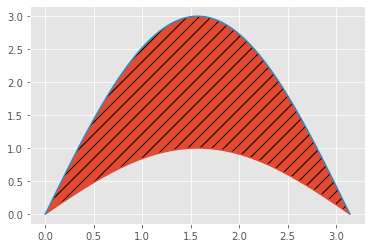

In [21]:
xs  = np.linspace(0., np.pi, 100)
y0s = np.sin(xs) 
y1s = 3 * np.sin(xs)
plt.plot(xs, y0s);
plt.plot(xs, y1s)
plt.fill_between(xs, y0s, y1s, hatch= '//');

$$
\int_0^\pi x \left( y + \frac{y^2}{2} \right) \Big|_{\sin x}^{3\sin x} \mathrm{d}x = \int_0^\pi x \left( 3 \sin x + \frac{9}{2} \sin^2 x - \sin x - \frac{\sin^2 x}{2} \right) \mathrm{d}x = \int_0^\pi x (4 \sin^2 x + 2 \sin x) \mathrm{d}x
$$



Como $\sin^2 x = \frac{1}{2} (1 - \cos 2 x)$

$$
\int_0^\pi 2x ( 1 - \cos 2x + \sin x) \mathrm{d}x = \\
x^2 - x \sin 2x - \frac{1}{2} \cos 2x - 2 x \cos x + 2 \sin x \Big|_0^\pi = \\
\pi^2 - \frac{1}{2} + 2 \pi + \frac{1}{2} = \pi^2 + 2 \pi
$$

donde
$$
\int x \cos 2x \, \mathrm{d}x = \frac{x}{2}\sin 2x + \frac{1}{4} \cos 2x  
$$

$$
\int x \sin x \, \mathrm{d}x = - x \cos x + \sin x 
$$


In [23]:
sp.integrate(x * sp.sin(x), x)

-x*cos(x) + sin(x)

In [52]:
sp.integrate(x * ( 1 + y), y)

x*y**2/2 + x*y

In [55]:
sp.integrate(x * ( 1 + y), (y, sp.sin(x), 3 * sp.sin(x)))

4*x*sin(x)**2 + 2*x*sin(x)

In [62]:
sp.integrate(sp.integrate(x * ( 1 + y), (y, sp.sin(x), 3 * sp.sin(x))), x)

x**2*sin(x)**2 + x**2*cos(x)**2 - 2*x*sin(x)*cos(x) - 2*x*cos(x) + sin(x)**2 + 2*sin(x)

In [57]:
sp.simplify(sp.integrate(sp.integrate(x * ( 1 + y), (y, sp.sin(x), 3 * sp.sin(x))), x))

x**2 - x*sin(2*x) - 2*x*cos(x) + 2*sin(x) - cos(2*x)/2 + 1/2

In [61]:
sp.integrate(sp.integrate(x * ( 1 + y), (y, sp.sin(x), 3 * sp.sin(x))), (x, 0, sp.pi))

2*pi + pi**2

In [51]:
d2int(x * (1 + y), (y, sp.sin(x), 3 * sp.sin(x)), (x, 0, sp.pi))

2*pi + pi**2

2.2
$$
\int_0^4 \int_0^{\sqrt{x}} (x^2 + y^2) \, \mathrm{d}x \mathrm{d}y
$$

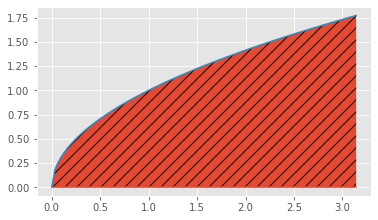

In [27]:
xs  = np.linspace(0., np.pi, 100)
y0s = np.zeros(100)
y1s = np.sqrt(xs)
plt.plot(xs, y0s);
plt.plot(xs, y1s)
plt.fill_between(xs, y0s, y1s, hatch= '//'); plt.gca().set_aspect('equal')

$$
\int_0^4 x^2  y +  \frac{y^3}{3} \Big|_0^{\sqrt{x}} \mathrm{d}x = \int_0^4 x^{5/2} + \frac{x^{3/2}}{3}\mathrm{d}x = \frac{2}{7} x^{7/2} + \frac{2}{15} x^{5/2} \Big|_0^4 = \frac{2^8}{7} + \frac{2^6}{15}
$$

In [31]:
(2**8  * 15 + 2**6 * 7), 7 * 15

(4288, 105)

In [74]:
d2int(x**2 + y**2, (y, 0., sp.sqrt(x)), (x, 0, 4))

4288/105

In [68]:
sp.integrate(x**2 + y**2, y)

x**2*y + y**3/3

In [70]:
sp.integrate(x**2 + y**2, (y, 0, sp.sqrt(x)))

x**(5/2) + x**(3/2)/3

In [72]:
sp.integrate(sp.integrate(x**2 + y**2, (y, 0, sp.sqrt(x))), x)

2*x**(7/2)/7 + 2*x**(5/2)/15

In [75]:
sp.integrate(sp.integrate(x**2 + y**2, (y, 0, sp.sqrt(x))), (x, 0, 4))

4288/105

2.3 

$$
\int_0^1 \int_{1-y}^1 (x+y)^2 \mathrm{d}x \mathrm{d}y
$$

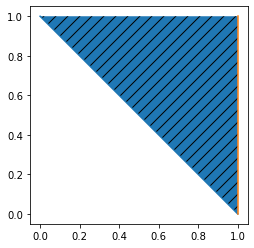

In [77]:
ys  = np.linspace(0., 1., 100)
x0s = 1-ys
x1s = np.ones(100)
plt.plot(x0s, ys);
plt.plot(x1s, ys)
plt.fill_betweenx(x0s, x1s, ys, hatch= '//');
plt.gca().set_aspect('equal', adjustable='box')

$$
\int_0^1 \int_{1-y}^1 x^2 + 2x y + y^2 \, \mathrm{d}x \mathrm{d}y = \int_0^1 \frac{x^3}{3} + x^2 y + x y^2 \, \Big|_{1-y}^1 \, \mathrm{d}y
$$

$$
\int_0^1 \left[ \frac{1}{3} + y + y^2 - (1-y) \left( \frac{(1-y)^2}{3} + (1-y) y  + y^2\right) \right]\, \mathrm{d}y
$$

$$
\int_0^1 \left[ \frac{1+3y+3y^2}{3} - (1-y) \left( \frac{1-2y + y^2}{3} +y -y^2 + y^2 \right)\right] \mathrm{d}y
$$

$$
\int_0^1 \frac{1}{3}  \left[ 1 + 3y + 3y^2 - (1-y) (1 + y + y^2)  \right] \mathrm{d}y 
$$

$$
\int_0^1 \frac{1}{3}  \left[ 1 + 3y + 3y^2 - 1 - y - y^2 + y + y^2 + y^3)  \right] \mathrm{d}y 
$$

$$
\int_0^1 y \left( 1 + y + \frac{y^2}{3}\right) \, \mathrm{d} y = \frac{y^2}{2} + \frac{y^3}{3} + \frac{y^4}{12} \Big|_0^1 = \frac{6 + 4 + 1}{12} = \frac{11}{12}
$$

In [79]:
sp.integrate((x+y)**2, x)

x**3/3 + x**2*y + x*y**2

In [33]:
sp.integrate((x+y)**2, (x, 1-y, 1))

-y**2*(1 - y) + y**2 - y*(1 - y)**2 + y - (1 - y)**3/3 + 1/3

In [32]:
sp.simplify(sp.integrate((x+y)**2, (x, 1-y, 1)))

y*(y**2/3 + y + 1)

In [81]:
sp.simplify(sp.integrate((x+y)**2, (x, 1-y, 1)))

y*(y**2/3 + y + 1)

In [82]:
sp.integrate(sp.integrate((x+y)**2, (x, 1-y, 1)), y)

y**4/12 + y**3/3 + y**2/2

In [83]:
sp.integrate(sp.integrate((x+y)**2, (x, 1-y, 1)), (y, 0, 1))

11/12

2.4 

$$
\int (2x^2 + y^2) \mathrm{d}x \mathrm{d}y
$$

En Polares, recordemos que $|J| = r$

$$
\int_0^a \int_0^{\pi/2} (r^2 \cos^2 \phi + r^2) \, r \mathrm{d}r \mathrm{d} \phi
$$

Que descomponemos en:

$$
i) \; \int_0^a \int_0^{\pi/2} r^3 \, \mathrm{d}r \mathrm{d} \phi = \frac{r^4}{4} \Big|_0^a \phi \Big|_0^{\pi/2} = \frac{\pi a^4}{8}
$$

$$
ii) \; \int_0^a \int_0^{\pi/2} r^3 \cos^2 \phi \, \mathrm{d}r \mathrm{d} \phi = \frac{r^4}{4} \Big|_0^a \frac{1}{2} \left(\phi + \frac{\sin 2 \phi}{2} \right)  \Big|_0^{\pi/2} = \frac{\pi a^4}{16}
$$

Por lo tanto

$$
\frac{\pi a^4}{8} + \frac{\pi a^4}{16} = \frac{3 \pi a^4}{16}
$$


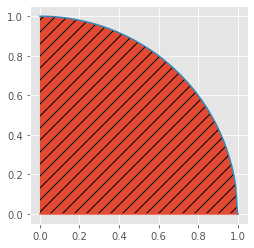

In [83]:
a = 1
xs  = np.linspace(0., a**2, 100)
y0s = np.zeros(100)
y1s = np.sqrt(a**2 - xs**2)
plt.plot(xs, y0s);
plt.plot(xs, y1s)
plt.fill_between(xs, y0s, y1s, hatch= '//');
plt.gca().set_aspect('equal', adjustable='box')

In [45]:
r, theta, a = sp.symbols('r theta a')

d2int( r*(r*sp.cos(theta))**2 + r**3, (r, 0, a), (theta, 0., sp.pi/2))

3*pi*a**4/16

In [38]:
sp.integrate(  r* (r*sp.cos(theta))**2, (r, 0, a))

a**4*cos(theta)**2/4

In [39]:
sp.integrate(sp.integrate( (r*sp.cos(theta))**2, (r, 0, a)), theta)

a**3*(theta/2 + sin(theta)*cos(theta)/2)/3

In [41]:
sp.integrate(sp.integrate( r * (r*sp.cos(theta))**2, (r, 0, a)), (theta, 0, sp.pi/2))

pi*a**4/16

In [42]:
sp.integrate(sp.integrate( r * r**2, (r, 0, a)), (theta, 0, sp.pi/2))

pi*a**4/8

In [43]:
sp.integrate(sp.integrate( r**3 * sp.cos(theta)**2 + r**3, (r, 0, a)), (theta, 0, sp.pi/2))

3*pi*a**4/16

2.5 

$$
\int_0^1 \int_0^{2x} \int_{x^2+y^2}^{x+y} \mathrm{d}z\mathrm{d}y\mathrm{d}x
$$

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x123727510>)

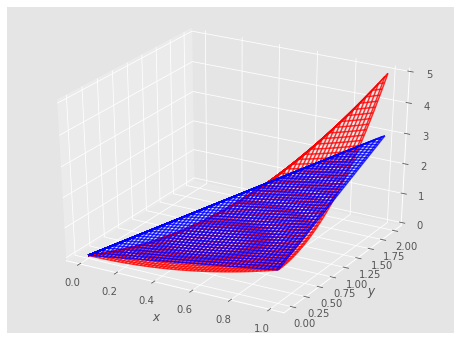

In [47]:
urange = (0., 1., 100)
vrange = (0., 2., 100)
xfun  = lambda u, v : u
yfun  = lambda u, v : np.minimum(v, 2*u)
zfun1 = lambda u, v : u*u + np.minimum(v, 2*u) *np.minimum(v, 2*u)
zfun2 = lambda u, v : u   + np.minimum(v, 2*u) 
zfun0 = lambda u, v : 0*u + 0 *v
gf.wfsurface(xfun, yfun, zfun1, urange, vrange, alpha = 0.8, color = 'r');
gf.wfsurface(xfun, yfun, zfun2, urange, vrange, alpha = 0.8, color = 'b', newfig = False)
#gf.wfsurface(xfun, yfun, zfun0, urange, vrange, alpha = 0.8, color = 'black', newfig = False)
#gf.wfsurface(xfun, cero, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = False)
#gf.wfsurface(cero, yfun, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = False);

$$
\int_0^1 \int_0^{2x} z \Big|_{x^2 + y^2}^{x+y} \mathrm{d}y\mathrm{d}x = 
\int_0^1 \int_0^{2x} x +y  -x^2 - y^2 \mathrm{d}y\mathrm{d}x 
$$

$$
\int_0^1 (x-x^2) y + \frac{y^2}{2} - \frac{y^3}{3} \Big|_0^{2x} \mathrm{d}x = 
\int_0^1 2 x (x-x^2) + 2 x^2 - \frac{8}{3} x^3 \, \mathrm{d}x
$$

$$
\int_0^1 2x^2 - 2 x^3 + 2x^2 - \frac{8}{3}x^3 \, \mathrm{d}x = 
\int_0^1 4 x^2 -\frac{14}{3} x^3 \, \mathrm{d}x = 
$$

$$
 \frac{4}{3} x^3 - \frac{14}{12} x^4 = \frac{16 - 14}{12} = \frac{1}{6} 
$$


$$
\int_0^1 2x^2 - x^3 + 2x^2 + \frac{8}{3}x^3 \, \mathrm{d}x
$$

In [95]:
sp.integrate(1, (z, x**2 + y**2, x+y))

-x**2 + x - y**2 + y

In [96]:
sp.integrate(sp.integrate(1, (z, x**2 + y**2, x+y)), y)

-y**3/3 + y**2/2 + y*(-x**2 + x)

In [102]:
sp.simplify(sp.integrate(sp.integrate(1, (z, x**2 + y**2, x+y)), (y, 0, 2 * x)))

x**2*(4 - 14*x/3)

In [103]:
sp.integrate(sp.integrate(sp.integrate(1, (z, x**2 + y**2, x+y)), (y, 0, 2 * x)), x)

-7*x**4/6 + 4*x**3/3

In [104]:
sp.integrate(sp.integrate(sp.integrate(1, (z, x**2 + y**2, x+y)), (y, 0, 2 * x)), (x, 0, 1))

1/6

In [100]:
d3int(1, (z, x*x + y*y, x + y), (y, 0., 2*x), (x, 0., 1))

1/6

## Ejercicio 4

**Ejercicio 4.1**

$$
\int_R \frac{x}{1 + x^2 y^2} \, \mathrm{d}x\mathrm{d}y
$$

con $x = u, \; y = \frac{v}{u}$

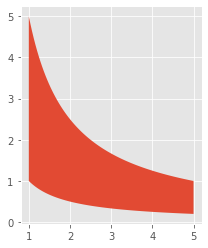

In [55]:
yup   = lambda x: 5./x
ydown = lambda x: 1./x
xs = np.linspace(1., 5., 100)

plt.fill_between(xs, ydown(xs), yup(xs));
plt.gca().set_aspect('equal');


Con $x =u, \; y = \frac{v}{u}$

La Región:
$$
x y = 1 \, (5); \; v = 1 \,(5); \;\; x = 1 \, (5); u = 1 \, (5) \Rightarrow 1 \le u \le 5, \; 1 \le v \le 5
$$


El Jacobiano:
$$
J = \left| \begin{array}{cc} 1 & 0 \\ 
-\frac{v}{u^2} & \frac{1}{u}
\end{array} \right| = \frac{1}{u}
$$

La función:
$$
f(u, v) = \frac{u}{1 + v^2}
$$



$$
\int_1^5 \int_1^5 \frac{u}{1+v^2} \frac{1}{u} \mathrm{d}u\mathrm{d}v = 
\int_1^5 \frac{1}{1+v^2} \mathrm{d}u\mathrm{d}v \\
$$

$$
u \Big|_1^5 \arctan v \Big|_1^5 = 4 ( \arctan 5 - \arctan 1) = 4 \arctan 5 - \pi
$$

In [60]:
sp.integrate(sp.integrate(1/(1+x**2), (y, 1, 5)), (x, 1, 5))

-pi + 4*atan(5)

In [57]:
sp.atan(1)

pi/4

**4.2**

$$
\int_R 3 xy \mathrm{d}x \mathrm{d}y
$$

Con el cambio: $x = \frac{1}{3}(2u+v), \;\, y = \frac{1}{3}(u - v)$

La región:

$$
x+y = 1, \; \frac{1}{3}(2u+v) + \frac{1}{3} (u - v) = 1, \; u = 1 \\
x+y = 4, \; u = 4 \\
x-2y = 0, \; \frac{1}{3}(2u+v) - \frac{2}{3} (u - v) = 0, \; v = 0 \\
x-2y = -4, \; v  = -4
$$

$$
R = \{ 1 \le u \le 4, -4 \le v \le 0 \}
$$

El jacobiano:


El Jacobiano:
$$
J = \left| \begin{array}{cc} \frac{2}{3} & \frac{1}{3} \\ 
\frac{1}{3} & \frac{-1}{3}
\end{array} \right| = \frac{-1}{3}, \Rightarrow |J| = \frac{1}{3}
$$

La función:
$$
f(u, v) = \frac{1}{3}(2u+v)(u-v) = \frac{1}{3} (2u^2 + uv - v^2) 
$$


$$
\int_1^4 \int_{-4}^0 \frac{1}{9} (2u^2 + uv - v^2) \, \mathrm{d}u\mathrm{d}v
$$

$$
\int_1^4 \frac{1}{9} \left[ 2 u^2 v + \frac{1}{2}u v^2 - \frac{1}{3}v^3 \right]_{-4}^0 \, \mathrm{d}u = 
\int_1^4  8 u^2 - 8 u -  \frac{64}{3} \, \mathrm{d}u
$$

$$
\frac{1}{9} \left[ \frac{8}{3} u^3 - 4 u^2 - \frac{64}{3}u \right]_{1}^4 \, \mathrm{d}u = \frac{44}{9}
$$

In [85]:
fun = lambda u : 8 * u**3 - 3 * 4 * u**2 - 64 * u

print(fun(4), fun(1), fun(4)-fun(1), ' => ', (fun(4)-fun(1))/3)


64 -68 132  =>  44.0


In [62]:
sp.integrate(2*x**2 + x*y - y**2, y)

2*x**2*y + x*y**2/2 - y**3/3

In [90]:
sp.integrate(2*x**2 + x*y - y**2, (y, -4, 0))

8*x**2 - 8*x - 64/3

In [91]:
sp.integrate(sp.integrate(2*x**2 + x*y - y**2, (y, -4, 0)), x)

8*x**3/3 - 4*x**2 - 64*x/3

In [92]:
sp.integrate(sp.integrate(2*x**2 + x*y - y**2, (y, -4, 0)), (x, 1, 4))

44

## Ejercicio 3

In [108]:
d3int(1, (z, -x -y, 0), (y, 0, x), (x, 0., 1))

1/2

$x^2 + 2y^2 = 2, \; z = 0, \; x + y + 2z = 2$

(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x1175ef160>)

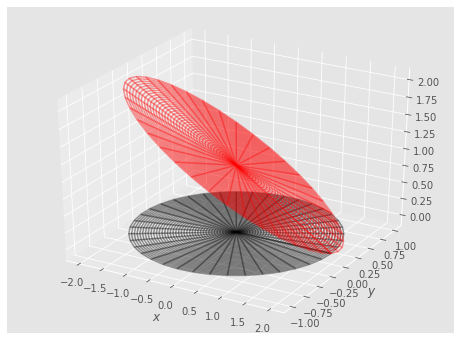

In [116]:
urange = (0., 1., 40)
vrange = (0., 2.*np.pi, 40)
xfun  = lambda u, v :   2. *u * np.cos(v)
yfun  = lambda u, v :   u * np.sin(v) 
zfun1 = lambda u, v :   1 -  u * np.cos(v) - u * np.sin(v) /2.
#zfun2 = lambda u, v : u   + np.minimum(v, 2*u) 
zfun0 = lambda u, v : 0*u + 0 *v
gf.wfsurface(xfun, yfun, zfun1, urange, vrange, alpha = 0.4, color = 'r');
#gf.wfsurface(xfun, yfun, zfun2, urange, vrange, alpha = 0.2, color = 'b', newfig = False)
gf.wfsurface(xfun, yfun, zfun0, urange, vrange, alpha = 0.4, color = 'black', newfig = False)
#gf.wfsurface(xfun, cero, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = False)
#gf.wfsurface(cero, yfun, zfun, rrange, phirange, alpha = 0.2, color = 'r', newfig = False);

In [128]:
d3int(1., (z, 0, 1 - x/2 - y/2), 
      (y, -sp.sqrt(1-x*x/2), sp.sqrt(1-x*x/2)), (x, -sp.sqrt(2.), sp.sqrt(2.)))

2*sqrt(2)*asin(0.707106781186548*sqrt(2)) + 2.98023223876953e-8*sqrt(2)*I

In [127]:
d3int(r * sp.sqrt(2), (z, 0, 1 - r * sp.cos(theta)/sp.sqrt(2.) - r * sp.sin(theta)/2), 
      (theta, 0, 2 * sp.pi), (r , 0, 1))

1.0*sqrt(2)*pi

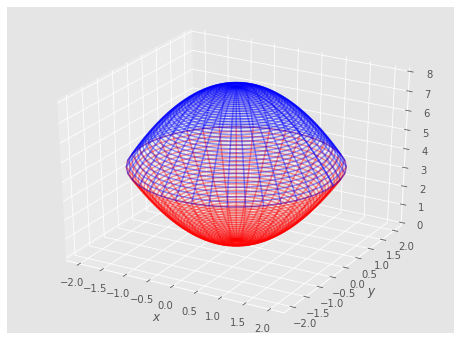

In [133]:
urange = (0., 2., 40)
vrange = (0., 2.*np.pi, 40)
xfun  = lambda u, v :   u * np.cos(v)
yfun  = lambda u, v :   u * np.sin(v)
zfun1 = lambda u, v :   u*u + 0.*v
zfun2 = lambda u, v :   8 - u*u + 0.*v
#zfun0 = lambda u, v : 0*u + 0 *v
gf.wfsurface(xfun, yfun, zfun1, urange, vrange, alpha = 0.4, color = 'r');
gf.wfsurface(xfun, yfun, zfun2, urange, vrange, alpha = 0.4, color = 'b', newfig = False);

In [135]:
d3int(r , (z, r*r, 8 - r*r), (theta, 0, 2 * sp.pi), (r , 0, 2))

16*pi

$x^2 + y^2 \le a^2; x^2 + z^2 \le a^2$

In [136]:
d3int(1 , (z, -sp.sqrt(a*a - x*x), sp.sqrt(a*a - x*x)), (y, -sp.sqrt(a*a - x*x), sp.sqrt(a*a - x*x)), (x, -a, a))

16*a**3/3